#

<h1><center>Exploratory Data Analysis Of Crime in Chicago</center></h1>
<center><img src="https://gisgeography.com/wp-content/uploads/2018/06/Chicago-Illinois-Skyline.png" align="center"/></center>



# Table of Contents

* [1. Introduction ](#1)
  * [1.1 Summary](#1.1)
* [2. Libraries & Configurations ](#2)
  * [2.1 Import Libraries](#2.1)
  * [2.2 Configurations](#2.2)
* [3 Descriptive Analysis](#3)
  * [3.1 Summary of Categorical Features](#3.1)
  * [3.2 Checking Duplicates](#3.2)
  * [3.3 Unique Values](#3.3)
* [4 Data Wrangling ](#4)
  * [4.1 Missing Values](#4.1)
    * [4.1.1 Change Data Type](#4.1.1)
    * [4.1.2 Imputation](#4.1.2)
  * [4.2 Binning](#4.2)
    * [4.2.1 Tenure](#4.2.1)
    * [4.2.2 MonthlyCharges](#4.2.2)
    * [4.2.3 TotalCharges](#4.2.3)
* [5 Univariate Analysis](#5)
  * [5.1 Statistical Normality Tests](#5.1)
    * [5.1.1 D’Agostino’s K^2 Test](#5.1.1)
    * [5.1.2 Anderson-Darling Test](#5.1.2)
  * [5.2 Visualization](#5.2)
* [6 Bivariate Analysis](#6)
  * [6.1 List Feature Based on Types](#6.1)
  * [6.2 Numerical & Numerical](#6.2)
      * [6.2.1 Spearman rank-order correlation](#6.2.1)
  * [6.3 Numerical & Categorical](#6.3)
    * [6.3.1 Kendall rank correlation coefficient](#6.3.1)
    * [6.3.2 Mann-Whitney U Test](#6.3.2)
    * [6.3.3 Polytomous(Nominal) with numeric](#6.3.3)
  * [6.4 Dichotomous & Dichotomous](#6.4)
    * [6.4.1 Phi’s correlation](#6.4.1)
  * [6.5 Categorical & categorical](#6.5)
    * [6.5.1 Chi-Square](#6.5.1)
    * [6.5.2 Cramér’s V](#6.5.2)
    * [6.5.3 Uncertainty Coefficient](#6.5.3)
  * [6.6 Collinearity](#6.6)
    * [6.6.1 Chi-Square](#6.6.1)
  * [6.8 Visualization](#6.8)
* [7 Multivariate Analysis](#7)
  * [7.1 Multicollinearity (Kruskal–Wallis)](#7.1)
  * [7.2 Frequency Distribution](#7.2)
  * [7.3 Churn Count Distribution](#7.3)
    * [7.3.1 Features With Cardinality = 2](#7.3.1)
    * [7.3.2 Features With Cardinality = 3](#7.3.2)
* [8 Feature Engineering](#8)
  * [8.1 Encode Target variable](#8.1)
* [9 Data Preparation](#9)
  * [9.1 Prepare Train/Test dataset](#9.1)
  * [9.2 Encoding & Scaling](#9.2)
* [10 Modeling](#10)
  * [10.1 Utility Function](#10.1)
    * [10.1.1 Training](#10.1.1)
    * [10.1.2 Model Interpretation](#10.1.2)
  * [10.2 Catboost](#10.2)
    * [10.2.1 Training](#10.2.1)
    * [10.2.2 Optuna Tuning](#10.2.2)
  * [10.3 XGBoost](#10.3)
    * [10.3.1 Training](#10.3.1)
    * [10.3.2 Optuna Tuning](#10.3.2)
  * [10.4 LGBM](#10.4)
    * [10.4.1 Training](#10.4.1)
    * [10.4.2 Optuna Tuning](#10.4.2)
  * [10.5 Stacking Ensemble](#10.5)
    * [10.5.1 Level 0 : Base Models](#10.5.1)
    * [10.5.2 Stacking Datasets](#10.5.2)
    * [10.5.3 Level 1 : Meta Model](#10.5.3)
    * [10.5.4 Stacking Model Evaluation](#10.5.4)
* [11 Conclusions](#11)
* [12 References](#12)

<a id='1'></a>
# 1 Introduction
The objective of this notebook is to present an extensive exploratory data analysis of crime in chicago using the **Chicago Crime Dataset**

In this notebook, I am going to explore more about crime in Chicago and try to answer few questions:

* How has crime in Chicago changed across years?
* Are some types of crimes more likely to happen in specific locations or specific time of the day or specific day of the week than other types of crimes?

Data source :

* <a href="https://www.kaggle.com/datasets/chicago/chicago-crime" target="_blank">
    <img src="https://img.shields.io/badge/Kaggle-035a7d?style=for-the-badge&logo=kaggle&logoColor=white" alt="Kaggle">
 </a>

* <a href="https://1drv.ms/u/s!ArhE6TZzYOy0gaZhFH_B3wthGUSjyQ?e=NR2gjH" target="_blank">
    <img src= "https://img.shields.io/badge/OneDrive-white?style=for-the-badge&logo=Microsoft%20OneDrive&logoColor=0078D4" alt="ONEDRIVE">
 </a>

GitHub Project Repository :
* [Chicago crime dataset EDA](https://github.com/SaliuA/Circle_17_Chicago_Crime_EDA)

### This project also serves as an assignment for the AltSchool Data science second semester assesment
* [Alt school Data science](https://altschoolafrica.com/)

<a id='1.1'></a>
## 1.1 Summary

* Dataset mostly has categorical variables
* Performed univariate and multivariate Analysis
* Performed hypothesis test

<a id='2'></a>
# 2 Libraries & Configurations

In [59]:
"""importing relevant libraries"""
import pandas as pd  # for data manipulation
import numpy as np   # for data computation
import matplotlib.pyplot as plt #for 2D data visualization
import seaborn as sns    #for 2D data visualization
from datetime import datetime #for 
from scipy import stats     # for statistics
from IPython.display import Markdown, display # for markdown function

# utility function to print markdown string
def printmd(string):
    display(Markdown(string))
#function to check for number of rows and colunms
def shape(df):
    print(f"There are {df.shape[0]:,} rows and {df.shape[1]} columns")

#function to check the percentage of missing values in each colunm
def missing_value_percentage(df):
    # Calculate the percentage of missing values for each column
    missing_percentage = df.isnull().mean().reset_index()
    missing_percentage.columns = ['Column', 'Missing Percentage']

    # Convert the proportion to percentage by multiplying by 100
    missing_percentage['Missing Percentage'] *= 100
    return missing_percentage
#function to drop redundant colunms
def col_to_drop(df, columns):
    """
    Drops columns from a DataFrame with the axis set to 1 and inplace set to True.

    Parameters:
    - df: Pandas DataFrame
    - columns: A list containing columns to be dropped

    Returns:
    - Remaining the colunms in the pandas dataframe
    """
    if isinstance(columns, list):
        for column in columns:
            try:
                df.drop(column, axis=1, inplace=True)
            except KeyError:
                print(f"{column} does not exist in the DataFrame")
        shape(df)
        return df.columns
    else:
        print("Please enter a list of columns to be dropped")
#function to crete season,day and month columns
def new_col(df, cols):
    """
    Creates the 'day', 'month', and 'season' columns from the 'Date' column.

    Parameters:
    - df: Pandas DataFrame
    - cols: A list containing the names of the day and month columns

    Returns:
    - The modified dataframe
    """
    month_to_season = {
        1: 'Winter', 2: 'Winter', 3: 'Spring',
        4: 'Spring', 5: 'Spring', 6: 'Summer',
        7: 'Summer', 8: 'Summer', 9: 'Fall',
        10: 'Fall', 11: 'Fall', 12: 'Winter'
    }

    # Check if the 'Date' column exists
    if 'Date' in df.columns:
        df['day'] = df['Date'].dt.day
        df['month'] = df['Date'].dt.month
        df['season'] = df['month'].map(month_to_season)
    else:
        print("Date column does not exist.")

    return df
# functio to Create a new column 'time_of_day' based on the '24 hour' column
def categorize_time(hour):
    if 4 <= int(hour.split(':')[0]) < 12:
        return 'Morning'
    elif 12 <= int(hour.split(':')[0]) < 18:
        return 'Afternoon'
    elif 18 <= int(hour.split(':')[0]) < 20:
        return 'Evening'
    else:
        return 'Night'
# pio.renderers.default='notebook' # to display plotly graph
%matplotlib inline

<a id='2.2'></a>
## 2.2 Configurations

In [85]:
# padding value
left_padding = 21

# seed value
SEED = 42
#set seaborn theme
sns.set_theme(style="darkgrid")


<a id='3'></a>
# 3 Descriptive Analysis

In [22]:
#loading the dataset
df_crime=pd.read_csv(r"C:\Users\Podos\OneDrive\Desktop\Data_science\Dataset\Crimes_-_2001_to_Present.csv\crime_data_chicago.csv")
#viewing the dataset
df_crime.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,6407111,HP485721,07/26/2008 02:30:00 PM,085XX S MUSKEGON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,...,10.0,46.0,14,1196638.0,1848800.0,2008,02/28/2018 03:56:25 PM,41.739980,-87.555120,"(41.739979622, -87.555120042)"
1,1,11398199,JB372830,07/31/2018 10:57:00 AM,092XX S ELLIS AVE,143C,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,...,8.0,47.0,15,1184499.0,1843935.0,2018,08/07/2018 04:02:59 PM,41.726922,-87.599747,"(41.726922145, -87.599746995)"
2,2,5488785,HN308568,04/27/2007 10:30:00 AM,062XX N TRIPP AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,...,39.0,12.0,05,1146911.0,1941022.0,2007,02/28/2018 03:56:25 PM,41.994138,-87.734959,"(41.994137622, -87.734959049)"
3,3,11389116,JB361368,07/23/2018 08:55:00 AM,0000X N KEELER AVE,0560,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,...,28.0,26.0,08A,1148388.0,1899882.0,2018,07/30/2018 03:52:24 PM,41.881217,-87.730590,"(41.881217483, -87.730589961)"
4,4,12420431,JE297624,07/11/2021 06:40:00 AM,016XX W HARRISON ST,051A,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,...,27.0,28.0,04A,1165430.0,1897441.0,2021,07/18/2021 04:56:02 PM,41.874174,-87.668082,"(41.874173691, -87.668082118)"


In [23]:
#checking the number of rows and colunms
shape(df_crime)

There are 2,278,726 rows and 23 columns


In [24]:
#checking information about the dataset
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278726 entries, 0 to 2278725
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          float64
 18  Year                  int64  
 19  Updated On            object 
 20  Latitude              float64
 21  Longitude             float64
 22  Location              object 
dtypes: bool

<a id='3.1'></a>
## 3.1 Summary of Categorical Features

In [25]:
df_crime.describe(include=['object']).T

,count,unique,top,freq
Case Number,2278725,2278678,HK172551,3
Date,2278726,1343546,01/01/2008 12:01:00 AM,81
Block,2278726,54347,100XX W OHARE ST,4878
IUCR,2278726,392,0820,184891
Primary Type,2278726,35,THEFT,479375
Description,2278726,515,SIMPLE,268418
Location Description,2275849,198,STREET,590957
FBI Code,2278726,26,06,479375
Updated On,2278726,4461,02/10/2018 03:50:01 PM,836558
Location,2254741,545376,"(41.976290414, -87.905227221)",4227


<a id='3.2'></a>
## 3.2 Checking Duplicates

In [27]:
print('Known observations: {}\nUnique observations: {}'.format(len(df_crime.index),len(df_crime.drop_duplicates().index)))

printmd("**No duplicates Found!**")

Known observations: 2278726
Unique observations: 2278726


**No duplicates Found!**

<a id='3.2.1'></a>
### 3.2.1 Dropping duplicate colunms

In [51]:
#creating a list of duplicated colunms  to drop
col= ['Unnamed: 0', 'ID','IUCR','FBI Code','X Coordinate', 'Y Coordinate','Location']
#calling the col_to_drop function
col_to_drop(df_crime,col)

There are 2,070,581 rows and 16 columns


Index(['Case Number', 'Date', 'Block', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'Community Area', 'Year', 'Updated On', 'Latitude',
       'Longitude'],
      dtype='object')

<a id='3.3'></a>
## 3.3 Unique Values

In [52]:
printmd("**Unique Values By Features**")
for feature in df_crime.columns:
    uniq = (df_crime[feature]).nunique()
    print(feature.ljust(left_padding),uniq)

**Unique Values By Features**

Case Number           2070535
Date                  1230193
Block                 33841
Primary Type          35
Description           511
Location Description  198
Arrest                2
Domestic              2
Beat                  303
District              23
Ward                  50
Community Area        78
Year                  22
Updated On            3620
Latitude              450183
Longitude             449993


<a id='4'></a>
# 4 Data Wrangling

<a id='4.1'></a>
## 4.1 Missing Values

In [45]:
#checking for missing data
printmd("**missing Values By Features**")
df_crime.isnull().sum()

**missing Values By Features**

Unnamed: 0              0
ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

In [49]:
#checking the percentage of missing values in each colunm
printmd("**percentage of missing Values By Features**")
missing_value_percentage(df_crime)

**percentage of missing Values By Features**

,Column,Missing Percentage
0,Unnamed: 0,0.0
1,ID,0.0
2,Case Number,0.0
3,Date,0.0
4,Block,0.0
5,IUCR,0.0
6,Primary Type,0.0
7,Description,0.0
8,Location Description,0.0
9,Arrest,0.0


In [42]:
#droping rows with missing data
df_crime.dropna(inplace=True)

In [50]:
#checking the number of rows and colunms after droping missing values
shape(df_crime)


There are 2,070,581 rows and 23 columns


<a id='4.2'></a>

## 4.2 Feature Engineering

In [57]:
#calling the new_col function
new_col(df_crime,["day","month","season"])
#re-indexing the colunm positions
df_crime=df_crime.reindex(columns=['Case Number', 'Date', 'Block', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'Community Area', 'day', 'month', 'Year', 'season',
       'Updated On', 'Latitude', 'Longitude'])

In [58]:
#Creating the hour colunm
df_crime['hour'] = df_crime["Date"].dt.strftime('%H:%M')

df_crime.head()

,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,day,month,Year,season,Updated On,Latitude,Longitude,hour
0,HP485721,2008-07-26 14:30:00,085XX S MUSKEGON AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,4.0,10.0,46.0,26,7,2008,Summer,02/28/2018 03:56:25 PM,41.739980,-87.555120,14:30
1,JB372830,2018-07-31 10:57:00,092XX S ELLIS AVE,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,4.0,8.0,47.0,31,7,2018,Summer,08/07/2018 04:02:59 PM,41.726922,-87.599747,10:57
2,HN308568,2007-04-27 10:30:00,062XX N TRIPP AVE,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,17.0,39.0,12.0,27,4,2007,Spring,02/28/2018 03:56:25 PM,41.994138,-87.734959,10:30
3,JB361368,2018-07-23 08:55:00,0000X N KEELER AVE,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,11.0,28.0,26.0,23,7,2018,Summer,07/30/2018 03:52:24 PM,41.881217,-87.730590,08:55
4,JE297624,2021-07-11 06:40:00,016XX W HARRISON ST,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,12.0,27.0,28.0,11,7,2021,Summer,07/18/2021 04:56:02 PM,41.874174,-87.668082,06:40


In [61]:

# Apply the categorization function to create the new column
df_crime['time_of_day'] = df_crime['hour'].apply(categorize_time)
df_crime.head()


,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,...,Community Area,day,month,Year,season,Updated On,Latitude,Longitude,hour,time_of_day
0,HP485721,2008-07-26 14:30:00,085XX S MUSKEGON AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,4.0,...,46.0,26,7,2008,Summer,02/28/2018 03:56:25 PM,41.739980,-87.555120,14:30,Afternoon
1,JB372830,2018-07-31 10:57:00,092XX S ELLIS AVE,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,4.0,...,47.0,31,7,2018,Summer,08/07/2018 04:02:59 PM,41.726922,-87.599747,10:57,Morning
2,HN308568,2007-04-27 10:30:00,062XX N TRIPP AVE,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,17.0,...,12.0,27,4,2007,Spring,02/28/2018 03:56:25 PM,41.994138,-87.734959,10:30,Morning
3,JB361368,2018-07-23 08:55:00,0000X N KEELER AVE,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,11.0,...,26.0,23,7,2018,Summer,07/30/2018 03:52:24 PM,41.881217,-87.730590,08:55,Morning
4,JE297624,2021-07-11 06:40:00,016XX W HARRISON ST,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,12.0,...,28.0,11,7,2021,Summer,07/18/2021 04:56:02 PM,41.874174,-87.668082,06:40,Morning


In [62]:
# create the names of the day of the week colunm
df_crime['day_of_week'] = df_crime['Date'].apply(lambda x: x.day_name())

In [63]:
df_crime.head()

,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,...,day,month,Year,season,Updated On,Latitude,Longitude,hour,time_of_day,day_of_week
0,HP485721,2008-07-26 14:30:00,085XX S MUSKEGON AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,4.0,...,26,7,2008,Summer,02/28/2018 03:56:25 PM,41.739980,-87.555120,14:30,Afternoon,Saturday
1,JB372830,2018-07-31 10:57:00,092XX S ELLIS AVE,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,4.0,...,31,7,2018,Summer,08/07/2018 04:02:59 PM,41.726922,-87.599747,10:57,Morning,Tuesday
2,HN308568,2007-04-27 10:30:00,062XX N TRIPP AVE,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,17.0,...,27,4,2007,Spring,02/28/2018 03:56:25 PM,41.994138,-87.734959,10:30,Morning,Friday
3,JB361368,2018-07-23 08:55:00,0000X N KEELER AVE,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,11.0,...,23,7,2018,Summer,07/30/2018 03:52:24 PM,41.881217,-87.730590,08:55,Morning,Monday
4,JE297624,2021-07-11 06:40:00,016XX W HARRISON ST,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,12.0,...,11,7,2021,Summer,07/18/2021 04:56:02 PM,41.874174,-87.668082,06:40,Morning,Sunday


In [64]:
#re-arranging the colunms
df_crime=df_crime.reindex(columns=['Case Number', 'Date', 'Block', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'Community Area', 'day', 'month', 'Year', 'season','hour','time_of_day','day_of_week',
       'Updated On', 'Latitude', 'Longitude'])

In [65]:
df_crime.head()

,Case Number,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,...,day,month,Year,season,hour,time_of_day,day_of_week,Updated On,Latitude,Longitude
0,HP485721,2008-07-26 14:30:00,085XX S MUSKEGON AVE,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,423,4.0,...,26,7,2008,Summer,14:30,Afternoon,Saturday,02/28/2018 03:56:25 PM,41.739980,-87.555120
1,JB372830,2018-07-31 10:57:00,092XX S ELLIS AVE,WEAPONS VIOLATION,UNLAWFUL POSS AMMUNITION,POOL ROOM,True,False,413,4.0,...,31,7,2018,Summer,10:57,Morning,Tuesday,08/07/2018 04:02:59 PM,41.726922,-87.599747
2,HN308568,2007-04-27 10:30:00,062XX N TRIPP AVE,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,1711,17.0,...,27,4,2007,Spring,10:30,Morning,Friday,02/28/2018 03:56:25 PM,41.994138,-87.734959
3,JB361368,2018-07-23 08:55:00,0000X N KEELER AVE,ASSAULT,SIMPLE,NURSING HOME/RETIREMENT HOME,False,False,1115,11.0,...,23,7,2018,Summer,08:55,Morning,Monday,07/30/2018 03:52:24 PM,41.881217,-87.730590
4,JE297624,2021-07-11 06:40:00,016XX W HARRISON ST,ASSAULT,AGGRAVATED - HANDGUN,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,12.0,...,11,7,2021,Summer,06:40,Morning,Sunday,07/18/2021 04:56:02 PM,41.874174,-87.668082


<a id='4.2'></a>

## 4.2 Data Transformation

In [70]:
#converting the date column into a datetime object
df_crime.Date=pd.to_datetime(df_crime.Date,format='%m/%d/%Y %I:%M:%S %p')

**Data Types Distribution after Data wrangling**

In [66]:
printmd("**Data Types**<br>")
df_crime.dtypes.value_counts()

**Data Types**<br>

object            10
float64            5
bool               2
int64              2
int32              2
datetime64[ns]     1
Name: count, dtype: int64

<a id='5.0'></a>

## 5.0 Data Interpretation

<a id='5.1'></a>

## 5.1 Frequency of Crime Within Categorical sub-groups

### <i>Frequency of Crime by year<i>

lets take a look at the trend of crime over the years, is crime increasing or decreasing?


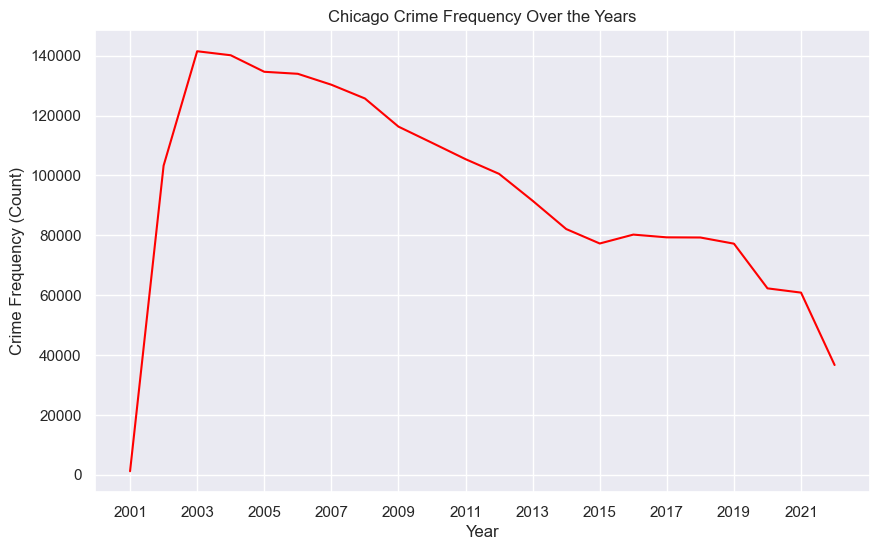

The year 2003 has the highest recorded instances of the occurence of crime with 2001 having the lowest occurence. There is a masive decline in the crime rate since 2001

In [91]:
#showing distribution of crime by day
crime_year=df_crime['Year'].value_counts().sort_values(ascending=False).reset_index()
# Set Seaborn theme
plt.figure(figsize=(10, 6))  # Adjust the width (10) and height (6) as desired
sns.lineplot(crime_year,x="Year",y="count",color="red")
plt.xticks(range(min(df_crime["Year"]), max(df_crime["Year"])+1, 2))  # Adjust the step value (5) as needed
# Show the plot

plt.xlabel('Year')
plt.ylabel('Crime Frequency (Count)')
plt.title('Chicago Crime Frequency Over the Years')
plt.show()
printmd(f"The year {crime_year.iloc[0]["Year"]} has the highest recorded instances of the occurence of crime with {crime_year.iloc[-1]["Year"]} having the lowest occurence. There is a masive decline in the crime rate since 2001")